In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv("C:\\Users\\User\\Downloads\\archive (26)\\portfolio_data.csv")

In [3]:
df_1

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


# Problem Statement:
The dataset contains historical stock price data for Amazon, Domino's Pizza, Bitcoin, and Netflix from May 1, 2013, to May 14, 2019. The objective is to analyze the trends and relationships between these stock prices over time and derive actionable insights for investors and financial analysts.

In [4]:
df_1.shape

(1520, 5)

In [5]:
df_1.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

In [6]:
df_1.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


# 1.Time series analysis

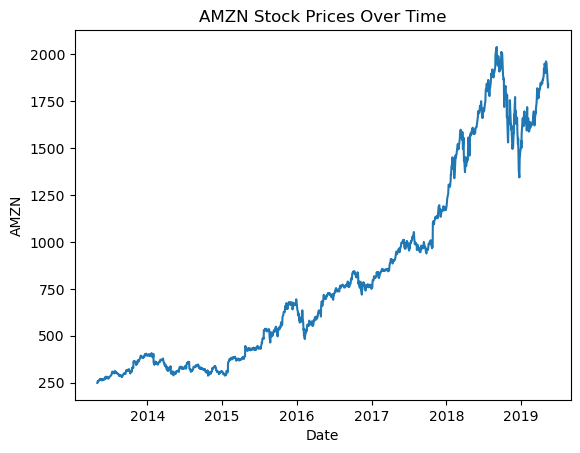

In [7]:

# Assuming 'Date' is in datetime format, if not, convert it first
df_1['Date'] = pd.to_datetime(df_1['Date'])

# Plotting
plt.plot(df_1['Date'], df_1['AMZN'])
plt.xlabel('Date')
plt.ylabel('AMZN')
plt.title('AMZN Stock Prices Over Time')
plt.show()


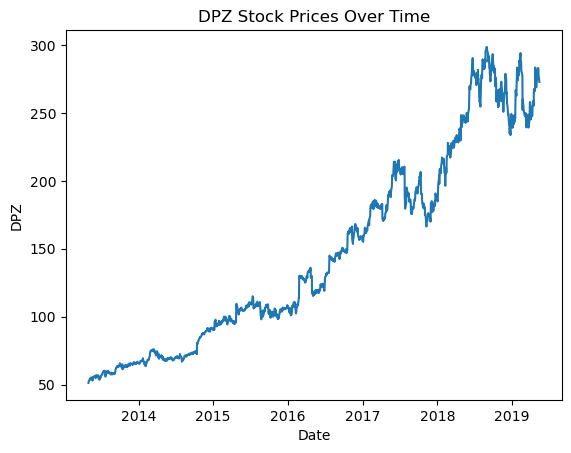

In [8]:
df_1['Date'] = pd.to_datetime(df_1['Date'])

# Plotting
plt.plot(df_1['Date'], df_1['DPZ'])
plt.xlabel('Date')
plt.ylabel('DPZ')
plt.title('DPZ Stock Prices Over Time')
plt.show()


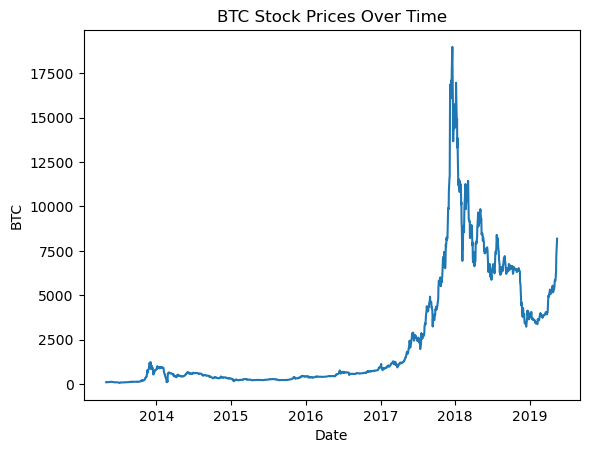

In [9]:
df_1['Date'] = pd.to_datetime(df_1['Date'])

# Plotting
plt.plot(df_1['Date'], df_1['BTC'])
plt.xlabel('Date')
plt.ylabel('BTC')
plt.title('BTC Stock Prices Over Time')
plt.show()


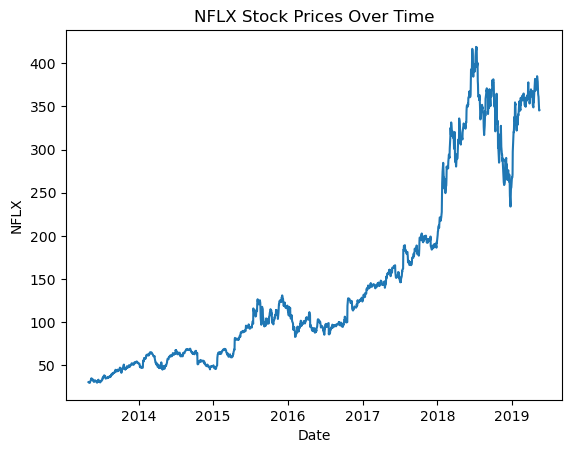

In [10]:
df_1['Date'] = pd.to_datetime(df_1['Date'])

# Plotting
plt.plot(df_1['Date'], df_1['NFLX'])
plt.xlabel('Date')
plt.ylabel('NFLX')
plt.title('NFLX Stock Prices Over Time')
plt.show()


# 2.Correlation analysis

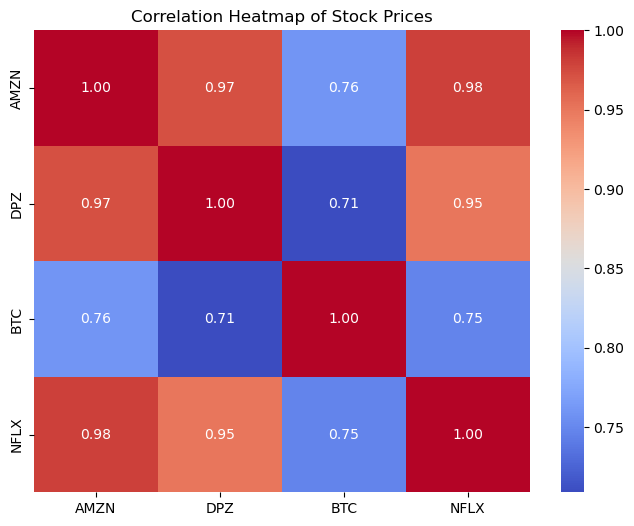

In [11]:

# Calculate the correlation matrix
correlation_matrix = df_1[['AMZN', 'DPZ', 'BTC', 'NFLX']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Prices')
plt.show()

In [12]:
df_1.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

# 3.Volatility analysis

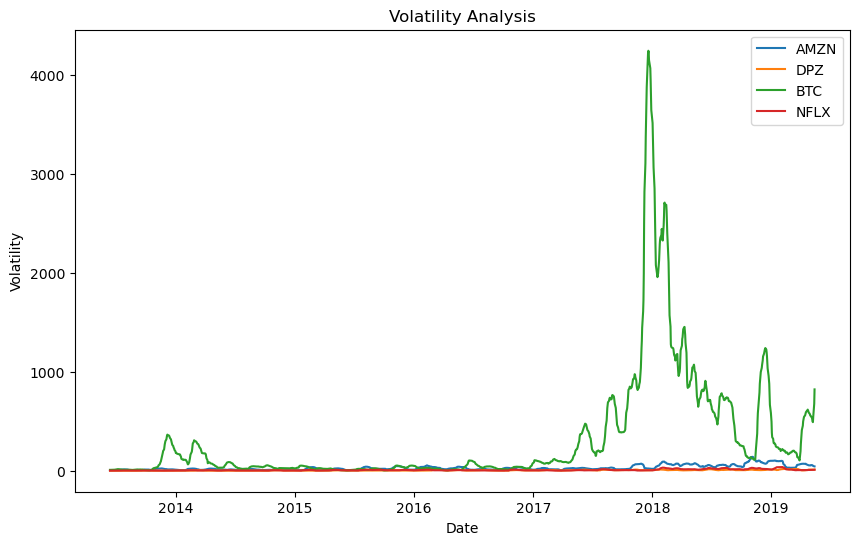

In [13]:

df_1['Date'] = pd.to_datetime(df_1['Date'])  # Convert the 'Date' column to datetime format
df_1.set_index('Date', inplace=True)  # Set the 'Date' column as the index

# Calculate the rolling standard deviation (volatility) for each stock
rolling_std = df_1.rolling(window=30).std()  # Adjust window size as needed

# Plot the volatility for each stock
plt.figure(figsize=(10, 6))
for column in rolling_std.columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)

plt.title('Volatility Analysis')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [14]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
from sklearn.preprocessing import MinMaxScaler

# Select columns to be scaled (excluding the 'Date' column)
columns_to_scale = ['AMZN', 'DPZ', 'BTC', 'NFLX']

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the selected columns
df_1[columns_to_scale] = scaler.fit_transform(df_1[columns_to_scale])



In [18]:
df_1

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,0.000000,0.000000,0.001936,0.002443
2013-05-02,0.002412,0.003218,0.001505,0.003022
2013-05-03,0.005482,0.005073,0.002288,0.002641
2013-05-06,0.004181,0.008140,0.002113,0.001628
2013-05-07,0.005303,0.011964,0.002303,0.000000
...,...,...,...,...
2019-05-08,0.932037,0.937416,0.322828,0.859822
2019-05-09,0.922045,0.933416,0.332685,0.855663
2019-05-10,0.916523,0.918099,0.376756,0.851273


In [19]:
from sklearn.model_selection import train_test_split

# Specify the percentage of data to be used for training
train_size = 0.8

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_1, train_size=train_size, shuffle=False)

# Display the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)


Training set shape: (1216, 4)
Testing set shape: (304, 4)


In [20]:

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step - 1):
      
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        
        # Create corresponding output labels (dataY) by selecting the next value after the window
        dataY.append(dataset[i + time_step, 0])
    
    return np.array(dataX), np.array(dataY)


In [45]:

# Set the time step
time_step = 100

# Create sequences for training set
X_train, y_train = create_dataset(train_data.values, time_step)

# Create sequences for testing set
X_test, y_test = create_dataset(test_data.values, time_step)

print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)


(1115, 100) (1115,)
(203, 100) (203,)


In [22]:
print(X_test.shape), print(y_test.shape)

(203, 100)
(203,)


(None, None)

# Model Building with LSTM

In [46]:
# Reshape input to for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
#Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:


# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)




Epoch 1/20

18/18 [==============================] - 19s 384ms/step - loss: 0.0099 - val_loss: 0.0044
Epoch 2/20
18/18 [==============================] - 4s 210ms/step - loss: 7.1994e-04 - val_loss: 0.0035
Epoch 3/20
18/18 [==============================] - 4s 207ms/step - loss: 3.8585e-04 - val_loss: 0.0029
Epoch 4/20
18/18 [==============================] - 4s 215ms/step - loss: 3.3137e-04 - val_loss: 0.0036
Epoch 5/20
18/18 [==============================] - 4s 211ms/step - loss: 3.1559e-04 - val_loss: 0.0038
Epoch 6/20
18/18 [==============================] - 4s 195ms/step - loss: 3.1498e-04 - val_loss: 0.0030
Epoch 7/20
18/18 [==============================] - 4s 203ms/step - loss: 3.2117e-04 - val_loss: 0.0041
Epoch 8/20
18/18 [==============================] - 3s 186ms/step - loss: 3.1113e-04 - val_loss: 0.0053
Epoch 9/20
18/18 [==============================] - 3s 174ms/step - loss: 3.1596e-04 - val_loss: 0.0032
Epoch 10/20
18/18 [==============================] - 3s 179ms/step

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 52ms/step


In [28]:
import math
from sklearn.metrics import mean_squared_err
y_pred = model.predict(X_test)

# Flatten y_test and y_pred to one dimension
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Evaluate the model performance


mse = mean_squared_error(y_test_flat, y_pred_flat)
print("Mean Squared Error on Test Set:", mse)


7/7 [==============================] - 0s 52ms/step
Mean Squared Error on Test Set: 0.0036724562543815633


In [29]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

0.0159050521174316

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.06060079417286182

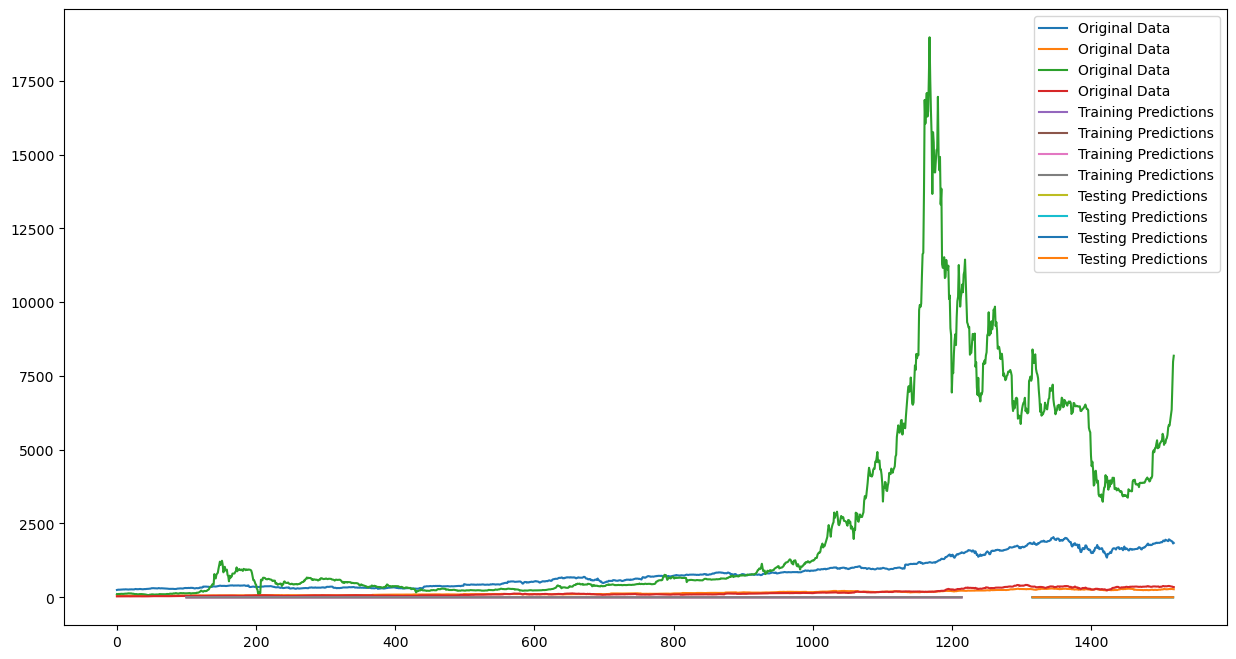

In [31]:

look_back = 100


# Plotting code
trainPredictPlot = np.empty_like(df_1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict.reshape(-1, 1)

testPredictPlot = np.empty_like(df_1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_1)-1, :] = test_predict.reshape(-1, 1)

# Plot baseline and predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(df_1), label='Original Data')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Testing Predictions')
plt.legend()
plt.show()


In [32]:
len(test_data)

304

In [33]:


n_steps = 10  
# Assuming test_data is a DataFrame containing the 'AMZN' column
temp_input = test_data['AMZN'].values  # Selecting only the 'AMZN' column

# Pad or truncate temp_input to ensure each sequence has the same length as n_steps
if len(temp_input) > n_steps:
    temp_input = temp_input[-n_steps:]  # Truncate the sequence
elif len(temp_input) < n_steps:
    temp_input = np.pad(temp_input, (n_steps - len(temp_input), 0), mode='constant')  # Pad the sequence

x_input = temp_input.reshape((1, n_steps, 1))  # Reshape to match model input shape

# Perform prediction using the model
yhat = model.predict(x_input, verbose=0)
print("Output shape:", yhat.shape)


Output shape: (1, 1)


In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[[0.9285483067975546],
 [0.9225748833705238],
 [0.9569860388114619],
 [0.9503372112094586],
 [0.9338406005349424],
 [0.9320374318651892],
 [0.9220445637149839],
 [0.9165233638340589],
 [0.8789525064170118],
 [0.8886885280683985]]

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [37]:
len(df_1)

1520

In [38]:


n_steps = 10  

# List to store the predicted values
lst_output = []
temp_input = list(test_data['AMZN'].values)  

# Generate predictions for the next 7 days
for i in range(7):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))  
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i, x_input.reshape(-1)))
        print("{} day output {}".format(i, yhat[0][0]))  
        temp_input.append(yhat[0][0])  
        temp_input.pop(0)  
        lst_output.extend(yhat.tolist())
    else:
        break

print(lst_output)


0 day input [0.92854831 0.92257488 0.95698604 0.95033721 0.9338406  0.93203743
 0.92204456 0.91652336 0.87895251 0.88868853]
0 day output 0.6582959890365601
1 day input [0.92257488 0.95698604 0.95033721 0.9338406  0.93203743 0.92204456
 0.91652336 0.87895251 0.88868853 0.65829599]
1 day output 0.6525266766548157
2 day input [0.95698604 0.95033721 0.9338406  0.93203743 0.92204456 0.91652336
 0.87895251 0.88868853 0.65829599 0.65252668]
2 day output 0.6420724987983704
3 day input [0.95033721 0.9338406  0.93203743 0.92204456 0.91652336 0.87895251
 0.88868853 0.65829599 0.65252668 0.6420725 ]
3 day output 0.6232658624649048
4 day input [0.9338406  0.93203743 0.92204456 0.91652336 0.87895251 0.88868853
 0.65829599 0.65252668 0.6420725  0.62326586]
4 day output 0.6002426147460938
5 day input [0.93203743 0.92204456 0.91652336 0.87895251 0.88868853 0.65829599
 0.65252668 0.6420725  0.62326586 0.60024261]
5 day output 0.5744256377220154
6 day input [0.92204456 0.91652336 0.87895251 0.88868853 0

In [39]:

n_steps = 10  

temp_input = test_data['DPZ'].values 


if len(temp_input) > n_steps:
    temp_input = temp_input[-n_steps:]  # Truncate the sequence
elif len(temp_input) < n_steps:
    temp_input = np.pad(temp_input, (n_steps - len(temp_input), 0), mode='constant')  # Pad the sequence

x_input = temp_input.reshape((1, n_steps, 1))  # Reshape to match model input shape

# Perform prediction using the model
yhat = model.predict(x_input, verbose=0)
print("Output shape:", yhat.shape)


Output shape: (1, 1)


In [40]:


n_steps = 10 

# List to store the predicted values
lst_output = []
temp_input = list(test_data['DPZ'].values)  

# Generate predictions for the next 7 days
for i in range(7):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1)) 
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i, x_input.reshape(-1)))
        print("{} day output {}".format(i, yhat[0][0]))  
        temp_input.append(yhat[0][0])  
        temp_input.pop(0)  
        lst_output.extend(yhat.tolist())
    else:
        break

print(lst_output)


0 day input [0.8901736  0.90173178 0.92367603 0.93284974 0.91413861 0.93741643
 0.93341558 0.91809901 0.8999536  0.89583139]
0 day output 0.6478544473648071
1 day input [0.90173178 0.92367603 0.93284974 0.91413861 0.93741643 0.93341558
 0.91809901 0.8999536  0.89583139 0.64785445]
1 day output 0.6463504433631897
2 day input [0.92367603 0.93284974 0.91413861 0.93741643 0.93341558 0.91809901
 0.8999536  0.89583139 0.64785445 0.64635044]
2 day output 0.6384210586547852
3 day input [0.93284974 0.91413861 0.93741643 0.93341558 0.91809901 0.8999536
 0.89583139 0.64785445 0.64635044 0.63842106]
3 day output 0.6229841709136963
4 day input [0.91413861 0.93741643 0.93341558 0.91809901 0.8999536  0.89583139
 0.64785445 0.64635044 0.63842106 0.62298417]
4 day output 0.6016312837600708
5 day input [0.93741643 0.93341558 0.91809901 0.8999536  0.89583139 0.64785445
 0.64635044 0.63842106 0.62298417 0.60163128]
5 day output 0.5774547457695007
6 day input [0.93341558 0.91809901 0.8999536  0.89583139 0.

In [41]:


n_steps = 10  # Assuming you want to predict based on 10 previous time steps

# Assuming test_data is a DataFrame containing the 'AMZN' column
temp_input = test_data['BTC'].values  # Selecting only the 'AMZN' column

# Pad or truncate temp_input to ensure each sequence has the same length as n_steps
if len(temp_input) > n_steps:
    temp_input = temp_input[-n_steps:]  # Truncate the sequence
elif len(temp_input) < n_steps:
    temp_input = np.pad(temp_input, (n_steps - len(temp_input), 0), mode='constant')  # Pad the sequence

x_input = temp_input.reshape((1, n_steps, 1))  # Reshape to match model input shape

# Perform prediction using the model
yhat = model.predict(x_input, verbose=0)
print("Output shape:", yhat.shape)


Output shape: (1, 1)


In [42]:

n_steps = 10  

# List to store the predicted values
lst_output = []
temp_input = list(test_data['BTC'].values)  

# Generate predictions for the next 7 days
for i in range(7):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))  # Reshape to match model input shape
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i, x_input.reshape(-1)))
        print("{} day output {}".format(i, yhat[0][0]))  # Only taking the first element of the prediction
        temp_input.append(yhat[0][0])  # Append the scalar value to temp_input
        temp_input.pop(0)  # Remove the oldest value from temp_input
        lst_output.extend(yhat.tolist())
    else:
        break

print(lst_output)


0 day input [0.28731724 0.3006836  0.30527026 0.30418522 0.3136622  0.32282757
 0.33268492 0.37675649 0.41848448 0.42926075]
0 day output 0.2197270542383194
1 day input [0.3006836  0.30527026 0.30418522 0.3136622  0.32282757 0.33268492
 0.37675649 0.41848448 0.42926075 0.21972705]
1 day output 0.22610364854335785
2 day input [0.30527026 0.30418522 0.3136622  0.32282757 0.33268492 0.37675649
 0.41848448 0.42926075 0.21972705 0.22610365]
2 day output 0.2294778972864151
3 day input [0.30418522 0.3136622  0.32282757 0.33268492 0.37675649 0.41848448
 0.42926075 0.21972705 0.22610365 0.2294779 ]
3 day output 0.2300352305173874
4 day input [0.3136622  0.32282757 0.33268492 0.37675649 0.41848448 0.42926075
 0.21972705 0.22610365 0.2294779  0.23003523]
4 day output 0.22815503180027008
5 day input [0.32282757 0.33268492 0.37675649 0.41848448 0.42926075 0.21972705
 0.22610365 0.2294779  0.23003523 0.22815503]
5 day output 0.2231985628604889
6 day input [0.33268492 0.37675649 0.41848448 0.42926075

In [43]:

n_steps = 10  

# Assuming test_data is a DataFrame containing the 'AMZN' column
temp_input = test_data['NFLX'].values  # Selecting only the 'AMZN' column

# Pad or truncate temp_input to ensure each sequence has the same length as n_steps
if len(temp_input) > n_steps:
    temp_input = temp_input[-n_steps:]  # Truncate the sequence
elif len(temp_input) < n_steps:
    temp_input = np.pad(temp_input, (n_steps - len(temp_input), 0), mode='constant')  # Pad the sequence

x_input = temp_input.reshape((1, n_steps, 1))  # Reshape to match model input shape

# Perform prediction using the model
yhat = model.predict(x_input, verbose=0)
print("Output shape:", yhat.shape)


Output shape: (1, 1)


In [44]:


n_steps = 10  

# List to store the predicted values
lst_output = []
temp_input = list(test_data['NFLX'].values)  

# Generate predictions for the next 7 days
for i in range(7):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i, x_input.reshape(-1)))
        print("{} day output {}".format(i, yhat[0][0])) 
        temp_input.append(yhat[0][0])  
        temp_input.pop(0)  
        lst_output.extend(yhat.tolist())
    else:
        break

print(lst_output)


0 day input [0.89689496 0.8975368  0.91286392 0.89653557 0.87545751 0.85982232
 0.85566322 0.85127306 0.81076018 0.81165869]
0 day output 0.6201947331428528
1 day input [0.8975368  0.91286392 0.89653557 0.87545751 0.85982232 0.85566322
 0.85127306 0.81076018 0.81165869 0.62019473]
1 day output 0.6111084818840027
2 day input [0.91286392 0.89653557 0.87545751 0.85982232 0.85566322 0.85127306
 0.81076018 0.81165869 0.62019473 0.61110848]
2 day output 0.5972940325737
3 day input [0.89653557 0.87545751 0.85982232 0.85566322 0.85127306 0.81076018
 0.81165869 0.62019473 0.61110848 0.59729403]
3 day output 0.5774465203285217
4 day input [0.87545751 0.85982232 0.85566322 0.85127306 0.81076018 0.81165869
 0.62019473 0.61110848 0.59729403 0.57744652]
4 day output 0.5547648072242737
5 day input [0.85982232 0.85566322 0.85127306 0.81076018 0.81165869 0.62019473
 0.61110848 0.59729403 0.57744652 0.55476481]
5 day output 0.5301192402839661
6 day input [0.85566322 0.85127306 0.81076018 0.81165869 0.62